In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import relativedelta
import warnings
from sklearn.impute import KNNImputer
warnings.filterwarnings("ignore")
#Reference:
#https://www.kaggle.com/code/kerneler/starter-car-insurance-claim-data-62f4f91c-d/notebook
#https://towardsdatascience.com/15-data-exploration-techniques-to-go-from-data-to-insights-93f66e6805df
#https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d

In [203]:
df = pd.read_csv("car_insurance_claim.csv")
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


### Opis zmiennych

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

Załadowane dane składają się z 10303 wierszy i 27 kolumn. Część zmiennych zawiera braki danych, które zostaną z badane w daleszej części analizy.

### Zawartość ramki danych

'ID' - Identyfikator </br>
'KIDSDRIV' - Liczba dzieci klienta mogących prowadzić samochód </br>
'BIRTH' - Data urodzenia </br>
'AGE' - Wiek </br>
'HOMEKIDS' - Liczba dzieci w domu klienta </br>
'YOJ' - Liczba przepracowanych lat w miejscu pracy</br>
'INCOME' - Dochód </br>
'PARENT1' - Czy klient jest samotnym rodzicem </br>
'HOME_VAL' - Wartość domu </br>
'MSTATUS' - Stan cywilny </br>
'GENDER' - Płeć </br>
'EDUCATION' - Poziom wykształcenia </br>
'OCCUPATION' - Zawód </br>
'TRAVTIME' - Czas dojazdu do pracy w minutach </br>
'CAR_USE' - Charakter użytkowania pojazdu (prywatny/komercyjny) </br>
'BLUEBOOK' - Wartość pojazdu </br>
'TIF' - Liczba lat jako klient TU (Time in Force) </br>
'CAR_TYPE' - Typ pojazdu </br>
'RED_CAR' - Czy samochód ma kolor czerwony </br>
'OLDCLAIM' - Łączna wartość szkód w ostatnich 5 latach </br>
'CLM_FREQ' - Liczba szkód w ostatnich 5 latach </br>
'REVOKED' - Odebranie prawa jazdy w ostatnich 7 latach  </br>
'MVR_PTS' - Punkty karne (Motor Vehicle Record Points) </br>
'CLM_AMT' - Wartość szkody </br>
'CAR_AGE' - Wiek samochodu </br>
'CLAIM_FLAG' - Wystąpienie szkody </br>
'URBANICITY' - Stopień urbanizacji miejsca zamieszkania </br>

### Weryfikacja unikalnych wartości i poprawności typów danych

In [205]:
for i in df.columns:
    print(i, df[i].dtype)
    print(df.loc[:,i].unique())

ID int64
[ 63581743 132761049 921317019 ...  67790126 849208064 680381960]
KIDSDRIV int64
[0 1 2 3 4]
BIRTH object
['16MAR39' '21JAN56' '18NOV51' ... '13AUG54' '18JUN51' '27FEB47']
AGE float64
[60. 43. 48. 35. 51. 50. 34. 54. 40. 44. 37. 53. 55. 45. 39. 59. 42. 31.
 28. 47. 46. 33. 32. 49. 36. 52. 41. 56. 38. 63. 62. 30. 29. 58. 64. 66.
 26. 61. 80. 57. nan 25. 27. 20. 21. 19. 72. 69. 24. 67. 22. 23. 65. 70.
 17. 16. 81. 73. 71. 68. 18. 76.]
HOMEKIDS int64
[0 1 2 3 4 5]
YOJ float64
[11. 10. 14. nan 12.  7.  5.  0. 13.  9. 17.  8. 15. 16.  6. 18. 23.  4.
  3.  2. 19.  1.]
INCOME object
['$67,349' '$91,449' '$52,881' ... '$164,669' '$107,204' '$53,235']
PARENT1 object
['No' 'Yes']
HOME_VAL object
['$0' '$257,252' '$124,191' ... '$332,591' '$170,611' '$197,017']
MSTATUS object
['z_No' 'Yes']
GENDER object
['M' 'z_F']
EDUCATION object
['PhD' 'z_High School' 'Bachelors' '<High School' 'Masters']
OCCUPATION object
['Professional' 'z_Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'H

Zidentyfikowano zmienne z nieprawidłowymi typami danych lub wartościami, które należy poprawić. Zmienna 'BIRTH' zapisana jest w formacie 'DDMMMRR' (np. '21MAR67') i traktowana jako tekst - należy dokonać konwersji na typ daty (datetime). Zmienne INCOME, HOME_VAL, BLUEBOOK, OLDCLAIM, CLM_AMT zawierają wartości liczbowe poprzedzone znakiem '$' z separatorem tysięcy ',' - oba znaki należy usunąć i dokonać konwersji na typ liczbowy (float/int). W danych występuje 10 zmiennych jakościowych traktowanych jako tekst a ponadto część wartości zawiera prefiks 'z_', który należy usunąć. Ww. zmienne powinny zostać przekonwertowane na typ kategorii (category).

### Oczyszczenie zmiennych i zmiana typów danych

2.1. Usunięcie znaków '$' i ',' w zmiennych ilosciowych

In [206]:
# Zamiana znaków '$' i ',' na '' i konwersja typu na float
for i in df.columns:
    n = 0
    for j in list(df[i].values):
        if '$' in str(j):
            n += 1
            print(i)
            if n >= 1:
                df[i] = df[i].str.replace('$', '')
                df[i] = df[i].str.replace(',', '').astype(np.float32)
                break

INCOME
HOME_VAL
BLUEBOOK
OLDCLAIM
CLM_AMT


2.2. Konwersja BIRTHDATE na typ daty

In [207]:
# Sprawdzenie czy wszystkie wartości w kolumnie 'BIRTH' mają dokładnie 7 znaków
df['BIRTH'].apply(lambda row: len(row)).agg(['min', 'max'])

min    7
max    7
Name: BIRTH, dtype: int64

In [208]:
# Sprawdzenie czy wartości mogą pochodzić z XXI wieku
df['BIRTH'].apply(lambda row: row[-2:]).agg(['min', 'max'])

min    18
max    87
Name: BIRTH, dtype: object

Daty urodzenia obejmują lata 1918-1987

In [209]:
# Modyfikacja roku urodzenia na pełny rok w celu łatwiejszej konwersji
df['BIRTH'] = df['BIRTH'].apply(lambda row: row[:-2] + '19' +  row[-2:])
df['BIRTH'].head()

0    16MAR1939
1    21JAN1956
2    18NOV1951
3    05MAR1964
4    05JUN1948
Name: BIRTH, dtype: object

In [210]:
df['BIRTH'] = pd.to_datetime(df['BIRTH'], format='%d%b%Y')

2.3. Usunięcie przedrostka 'z_'

In [211]:
# Wartości przed zmianą
for i in ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE', 'URBANICITY']:
    print(df.loc[:,i].unique())

['z_No' 'Yes']
['M' 'z_F']
['PhD' 'z_High School' 'Bachelors' '<High School' 'Masters']
['Professional' 'z_Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'Home Maker' 'Student']
['Minivan' 'Van' 'z_SUV' 'Sports Car' 'Panel Truck' 'Pickup']
['Highly Urban/ Urban' 'z_Highly Rural/ Rural']


In [212]:
# Usunięcie przedrostka 'z_'
for i in ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE', 'URBANICITY']:
    df.loc[:,i] = df.loc[:,i].apply(lambda row: row.replace('z_', '') if type(row) == str else row)

In [213]:
# Wartości po zmianie
for i in ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE', 'URBANICITY']:
    print(df.loc[:,i].unique())

['No' 'Yes']
['M' 'F']
['PhD' 'High School' 'Bachelors' '<High School' 'Masters']
['Professional' 'Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer' nan
 'Home Maker' 'Student']
['Minivan' 'Van' 'SUV' 'Sports Car' 'Panel Truck' 'Pickup']
['Highly Urban/ Urban' 'Highly Rural/ Rural']


2.4. Weryfikacja pozostałych kategorii

In [214]:
for i in ['PARENT1', 'CAR_USE', 'RED_CAR', 'REVOKED']:
    print(df.loc[:,i].unique())

['No' 'Yes']
['Private' 'Commercial']
['yes' 'no']
['No' 'Yes']


In [215]:
df['RED_CAR'] = df['RED_CAR'].replace(['no', 'yes'], ['No', 'Yes'])

2.5. Konwersja zmiennych typu tekstowego na typ kategorii oraz zmiennych 0-1 na bool

In [220]:
df['PARENT1'][df['PARENT1'] == 'Yes'] = True
df['PARENT1'][df['PARENT1'] == 'No'] = False
df['PARENT1'] = df['PARENT1'].astype('bool')

df['MSTATUS'][df['MSTATUS'] == 'Yes'] = True
df['MSTATUS'][df['MSTATUS'] == 'No'] = False
df['MSTATUS'] = df['MSTATUS'].astype('bool')

df['RED_CAR'][df['RED_CAR'] == 'Yes'] = True 
df['RED_CAR'][df['RED_CAR'] == 'No'] = False
df['RED_CAR'] = df['RED_CAR'].astype('bool')

df['REVOKED'][df['REVOKED'] == 'Yes'] = True
df['REVOKED'][df['REVOKED'] == 'No'] = False
df['REVOKED'] = df['REVOKED'].astype('bool')

df['CLAIM_FLAG'] = df['CLAIM_FLAG'].astype('bool')

In [222]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10302 non-null  int64         
 1   KIDSDRIV    10302 non-null  int64         
 2   BIRTH       10302 non-null  datetime64[ns]
 3   AGE         10295 non-null  float64       
 4   HOMEKIDS    10302 non-null  int64         
 5   YOJ         9754 non-null   float64       
 6   INCOME      9732 non-null   float32       
 7   PARENT1     10302 non-null  bool          
 8   HOME_VAL    9727 non-null   float32       
 9   MSTATUS     10302 non-null  bool          
 10  GENDER      10302 non-null  category      
 11  EDUCATION   10302 non-null  category      
 12  OCCUPATION  9637 non-null   category      
 13  TRAVTIME    10302 non-null  int64         
 14  CAR_USE     10302 non-null  category      
 15  BLUEBOOK    10302 non-null  float32       
 16  TIF         10302 non-

Po wykonaniu powyższych operacji zmienne mają poprawne typy danych:
- 11 zmiennych jakościowych (w tym 5 zmiennych 0-1)
- 15 zmiennych ilościowych
- 1 zmienna opisująca datę.

### Walidacja dat i zmiennych ilościowych w zbiorze

3.1. Walidacja zakresu

In [226]:
df.iloc[:,1:].agg(['min', 'max'])

,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,TRAVTIME,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
min,0,1918-07-04,16.0,0,0.0,0.0,False,0.0,False,5,1500.0,1,False,0.0,0,False,0,0.0,-3.0,False
max,4,1987-12-03,81.0,5,23.0,367030.0,True,885282.0,True,142,69740.0,25,True,57037.0,5,True,13,123247.0,28.0,True


Zakresy wartości zmiennych nie budzą zastrzeżeń za wyjątkiem zmiennej 'CAR_AGE', w której występuje jedna wartość ujemna:

In [227]:
len(df[df['CAR_AGE'] < 0])

1

In [228]:
df[df['CAR_AGE'] < 0].squeeze()

ID                      676425834
KIDSDRIV                        0
BIRTH         1952-06-02 00:00:00
AGE                            47
HOMEKIDS                        0
YOJ                            12
INCOME                      48696
PARENT1                     False
HOME_VAL                   212014
MSTATUS                     False
GENDER                          F
EDUCATION               Bachelors
OCCUPATION           Professional
TRAVTIME                       46
CAR_USE                   Private
BLUEBOOK                    15390
TIF                             4
CAR_TYPE                   Pickup
RED_CAR                     False
OLDCLAIM                    33521
CLM_FREQ                        3
REVOKED                      True
MVR_PTS                         1
CLM_AMT                      1469
CAR_AGE                        -3
CLAIM_FLAG                   True
URBANICITY    Highly Urban/ Urban
Name: 8771, dtype: object

Prawdopodobną przyczyną błędu może być przypadkowe dopisanie znaku '-' przed wartością 3. Niepoprawną wartość należałoby usunąć, a następnie dokonać imputacji na podstawie posiadanych informacji o pozostałych zmiennych i obserwacjach lub po prostu zmienić ją na 3. Przed zastąpieniem wartości liczbą 3 zweryfikowano statystyki dotyczące wartości samochodu i dochodu 12 klientów posiadających 3-letnie pickupy: 

In [229]:
# BLUEBOOK: 15390, INCOME: 48696
df[(df['CAR_TYPE'] == 'Pickup') & (df['CAR_AGE'] == 3)][['BLUEBOOK', 'INCOME']].agg(['median', 'max', 'min', 'count'])

,BLUEBOOK,INCOME
median,9575.0,34522.0
max,28870.0,85731.0
min,4600.0,5409.0
count,12.0,11.0


Wartość samochodu klienta z niepoprawnym wiekiem pojazdu mieści się w zakresie 4600-28870 i przewyższa medianę. Biorąc pod uwagę fakt, że również dochód klienta jest wyższy od dochodu przeciętnego właściciela analogicznego pojazdu można uznać, że analizowany klient rzeczywiście posiada 3-letni samochód będący po prostu lepszym modelem niż samochód przeciętnego klienta ze względu na wyższe dochody.

In [230]:
df.loc[8771, 'CAR_AGE'] = 3

3.2. Weryfikacja czy wszystkie dane dotyczą tego samego roku

In [231]:
dates_check = (df[~df['AGE'].isna()]['BIRTH'] + df[~df['AGE'].isna()]['AGE'].apply(lambda row: relativedelta.relativedelta(years=row))).apply(lambda row: row.year)
dates_check.agg(['min', 'max'])

min    1998
max    1999
dtype: int64

Na podstawie analizy dat urodzenia i wieku klientów stwierdzono, że dane dotyczą lat 1998 i 1999. Prawdopodobne wydaje się, że wiek klienta określony jest na dzień zawarcia polisy, natomiast dane mogą dotyczyć szkód zgłoszonych w roku 1999. W zdecydowanej większośi bowiem uzyskany rok to 1999, zaś liczba obserwacji wskazujących na rok 1998 jest zbyt duża, aby można było uznać ją za błędną:

In [232]:
dates_check.value_counts()

1999    9050
1998    1245
dtype: int64

3.3. Weryfikacja występowania braków wieku i możliwości uzupełnienia ich wykorzystując datę urodzenia

In [235]:
df[df['AGE'].isna()]

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
295,242777133,0,1986-02-18,NaN,2,8.0,2954.0,True,0.0,False,...,Sports Car,True,10099.0,2,False,4,6142.0,5.0,True,Highly Urban/ Urban
1317,55084702,0,1983-11-21,NaN,3,0.0,0.0,True,0.0,False,...,Minivan,True,0.0,0,False,7,3092.0,8.0,True,Highly Urban/ Urban
1651,194301482,0,1984-10-18,NaN,2,0.0,0.0,True,0.0,False,...,SUV,True,0.0,0,False,0,3444.0,6.0,True,Highly Urban/ Urban
3749,919557945,0,1986-02-17,NaN,2,0.0,NaN,True,0.0,False,...,Sports Car,True,25235.0,1,True,0,2541.0,13.0,True,Highly Urban/ Urban
4365,968439150,0,1984-02-15,NaN,3,12.0,16227.0,False,NaN,True,...,Van,True,0.0,0,False,6,5640.0,1.0,True,Highly Urban/ Urban
4554,285745137,0,1985-08-17,NaN,0,9.0,14484.0,False,0.0,False,...,Sports Car,True,4518.0,1,False,1,4798.0,1.0,True,Highly Urban/ Urban
5227,945868698,0,1987-12-03,NaN,0,0.0,0.0,False,NaN,True,...,SUV,True,4656.0,4,False,3,0.0,1.0,False,Highly Rural/ Rural


Wszystkie obserwacje, które nie posiadają wartości opisującej wiek dotyczą osób urodzonych w latach 1983-1987, a zatem mających mniej niż 16 lat w roku, którego dotyczą dane. Należy zauważyć, że minimalny wiek klienta w posiadanych danych to właśnie 16 lat. Co ciekawe w przypadku 6 z 7 analizowanych klientów odnotowano szkodę. 5 z 7 klientów ma 2 lub 3 dzieci, jednak prawdopodonie na tyle młodych, że nie posiadają one jeszcze prawa jazdy ('KIDSDRIV' = 0). Wydaje się, że w większości przypadków rzeczywiście obserwacje dotyczą młodych klientów, jednak z pewnością nie takich, którzy mogliby mieć mniej niż 16 lat. Zmienną 'BIRTHDATE' można więc w ww. przypadkach uznać za błędną. Tym samym biorąc pod uwagę, że w pozostałych przypadkach wiek jest uzupełniony, zmienna nie wnosi żadnej dodatkowej wartości i można usunąć ją ze zbioru.

In [236]:
del df['BIRTH']

3.4. Weryfikacja poprawności zmiennej YOJ (Years on Job)

In [237]:
# Wyliczenie wieku klienta w momencie rozpoczęcia pracy
yoj_check = (df['AGE'] - df['YOJ']).value_counts().sort_index()
yoj_check[:20]

4.0       1
5.0       2
6.0       1
8.0       2
9.0       7
10.0      5
11.0     11
12.0     23
13.0     25
14.0     44
15.0     40
16.0     53
17.0     82
18.0     98
19.0    117
20.0    122
dtype: int64

In [238]:
yoj_check.loc[0:13].sum()

77

In [239]:
display(df[(df['AGE'] - df['YOJ']) <= 13][['INCOME', 'HOME_VAL', 'BLUEBOOK', 'YOJ']].agg(['count', 'mean', 'median']))
display(df[(df['AGE'] - df['YOJ']) > 13][['INCOME', 'HOME_VAL', 'BLUEBOOK', 'YOJ']].agg(['count', 'mean', 'median']))
display(df[(df['AGE'] - df['YOJ']) <= 13]['EDUCATION'].value_counts(normalize=True))
display(df[(df['AGE'] - df['YOJ']) > 13]['EDUCATION'].value_counts(normalize=True))

,INCOME,HOME_VAL,BLUEBOOK,YOJ
count,76.000000,74.000000,77.000000,77.000000
mean,29240.486328,89123.460938,11047.791992,12.493506
median,21488.000000,84216.500000,9430.000000,12.000000


,INCOME,HOME_VAL,BLUEBOOK,YOJ
count,9137.000000,9131.000,9670.000000,9670.000000
mean,62012.292969,155185.625,15666.333008,10.462565
median,54067.000000,161587.000,14390.000000,11.000000


High School     0.428571
Bachelors       0.285714
<High School    0.233766
Masters         0.051948
PhD             0.000000
Name: EDUCATION, dtype: float64

High School     0.288211
Bachelors       0.272389
Masters         0.201965
<High School    0.145502
PhD             0.091934
Name: EDUCATION, dtype: float64

Zidentyfikowano przypadki, które budzą wątpliwości co do merytorycznej poprawności danych dotyczących wieku i liczby przepracowanych lat. W 77 z nich klient musiałby rozpocząć pracę w wieku co najwyżej 13 lat. Analizując powyższe przypadki i porównując je z pozostałymi obserwacjami można stwierdzić wyraźne różnice w zamożności między obiema grupami pomimo podobnej liczby przepracowanych lat. Są to także osoby, które przeciętnie charakteryzują się niższym wykształceniem w stosunku do pozostałych klientów, co może sugerować wczesne rozpoczęcie pracy związane np. z trudną sytuacją materialną. Nie można zatem z całą pewnością stwierdzić błędów w danych, tym bardziej, że przypadki rozpoczęcia pracy w wieku poniżej 10 lat, a więc szczególnie podejrzane, występują tylko 13 razy. Należy jednak mieć na uwadze, że dane mogą zawierać błędy.

### Analiza i imputacja braków danych

In [240]:
df.isna().sum()

ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

### Wstępna analiza danych

5.1. Podstawowe statystyki opisowe zmiennych ilościowych

In [241]:
report = pd.DataFrame(df.iloc[:,1:].describe()).round(2)
report

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE
count,10302.00,10295.00,10302.00,9754.00,9732.00,9727.00,10302.00,10302.00,10302.00,10302.00,10302.00,10302.00,10302.00,9663.00
mean,0.17,44.84,0.72,10.47,61572.14,154522.83,33.42,15659.95,5.33,4033.98,0.80,1.71,1511.27,8.30
std,0.51,8.61,1.12,4.11,47457.46,129186.62,15.87,8428.76,4.11,8733.08,1.15,2.16,4725.11,5.71
min,0.00,16.00,0.00,0.00,0.00,0.00,5.00,1500.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,39.00,0.00,9.00,27584.00,0.00,22.00,9200.00,1.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,45.00,0.00,11.00,53529.00,160661.00,33.00,14400.00,4.00,0.00,0.00,1.00,0.00,8.00
75%,0.00,51.00,1.00,13.00,86166.00,238256.00,44.00,20890.00,7.00,4647.50,2.00,3.00,1144.75,12.00
max,4.00,81.00,5.00,23.00,367030.00,885282.00,142.00,69740.00,25.00,57037.00,5.00,13.00,123247.00,28.00


5.2. Rozkłady zmiennych ilościowych

In [ ]:
plt.style.use('ggplot')

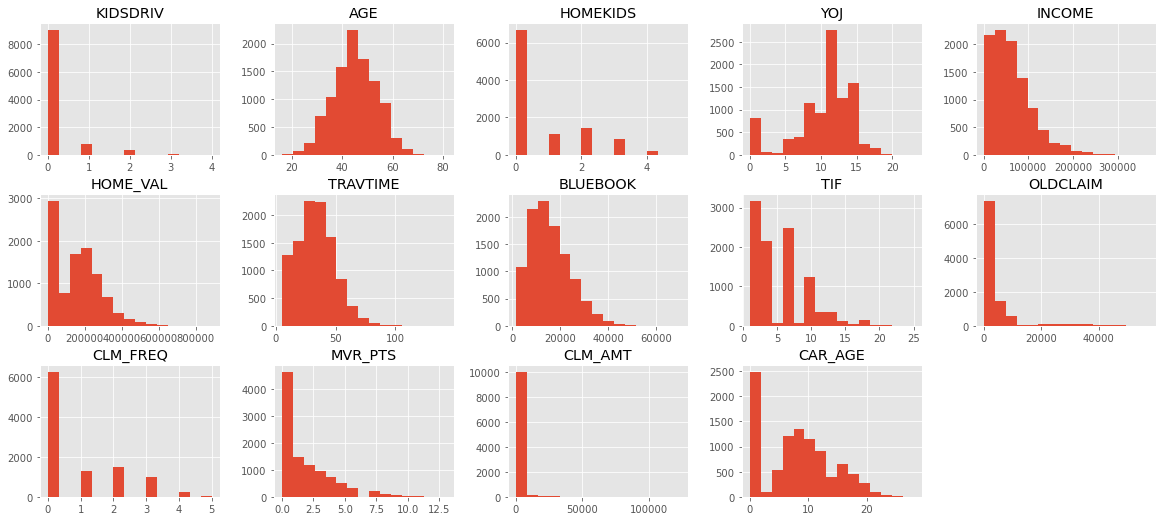

In [ ]:
df[list(report.columns)].hist(bins=15, figsize=(20, 15), layout=(5, 5))
plt.show()

5.3. Zależności pomiędzy zmiennymi ilościowymi

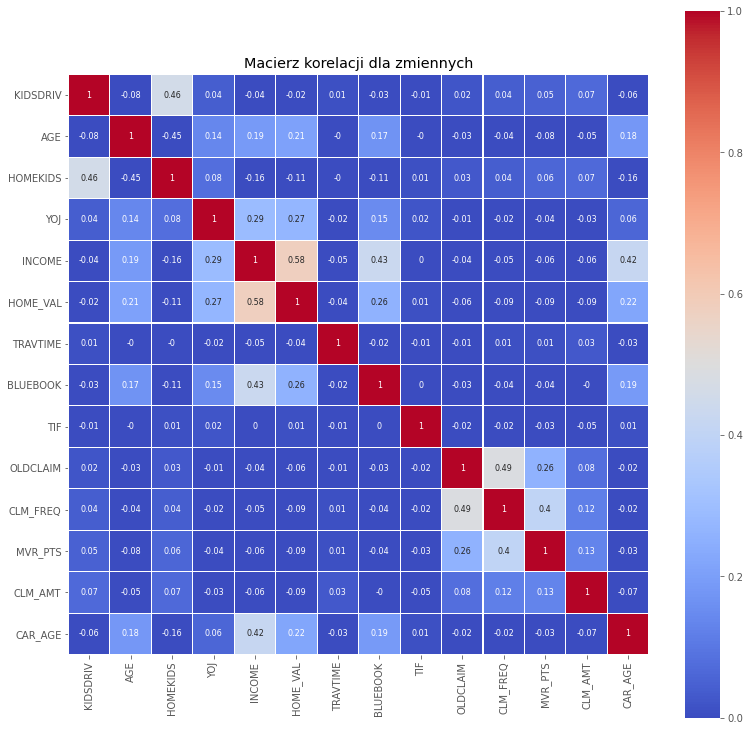

In [264]:
numeric_cols = []
for c in df.columns[1:]:
    if str(df.loc[:, c].dtype) not in ['category', 'bool']:
        numeric_cols.append(c)


fig=plt.figure(figsize = (13, 13))
ax1 = fig.add_subplot(111)
corr = df[numeric_cols].corr().round(2)
sns.heatmap(corr, vmin = 0.0, vmax = 1, square=True, linewidths = 0.1, annot = True, annot_kws={"size" : 8}, cmap = "coolwarm")
plt.title("Macierz korelacji dla zmiennych")
plt.show()

5.3. Częstości występowania wariantów zmiennych jakościowych

In [266]:
for i in df.columns:
    if str(df[i].dtype) in ['category', 'bool']:
        val_counts_df = df[i].value_counts()
        val_counts_norm_df = pd.DataFrame(df[i].value_counts(normalize=True))
        val_counts_norm_df.columns = ['Udział %']
        print(pd.concat([val_counts_df, val_counts_norm_df], axis=1))
        print('\n')

       PARENT1  Udział %
False     8959  0.869637
True      1343  0.130363


       MSTATUS  Udział %
True      6188   0.60066
False     4114   0.39934


   GENDER  Udział %
F    5545  0.538245
M    4757  0.461755


              EDUCATION  Udział %
High School        2952  0.286546
Bachelors          2823  0.274024
Masters            2078  0.201708
<High School       1515  0.147059
PhD                 934  0.090662


              OCCUPATION  Udział %
Blue Collar         2288  0.237418
Clerical            1590  0.164989
Professional        1408  0.146104
Manager             1257  0.130435
Lawyer              1031  0.106984
Student              899  0.093286
Home Maker           843  0.087475
Doctor               321  0.033309


            CAR_USE  Udział %
Private        6513  0.632207
Commercial     3789  0.367793


             CAR_TYPE  Udział %
SUV              2883  0.279849
Minivan          2694  0.261503
Pickup           1772  0.172005
Sports Car       1179  0.114444
Van      

### Scenariusz eksploracji danych zawarte w analizie

1. Weryfikacja unikalnych wartości
2. Eliminacja błędów danych
3. Rozkłady zmiennych
4. Liczebności/Czestość zdarzeń
5. Analiza pareto
6. Zależności pomiędzy zmiennymi

2.3 Zamiana teskstu na factory

In [244]:
# To kodowanie na razie bym odłożył na później PS

# df['GENDER'][df['GENDER'] == 'M'] = 1 
# df['GENDER'][df['GENDER'] == 'F'] = 0 

# df['CAR_USE'][df['CAR_USE'] == 'Private'] = 1 
# df['CAR_USE'][df['CAR_USE'] == 'Commercial'] = 0 

# df['CAR_USE'][df['CAR_USE'] == 'Private'] = 1 
# df['CAR_USE'][df['CAR_USE'] == 'Commercial'] = 0 

# df['URBANICITY'][df['URBANICITY'] == df['URBANICITY'].unique()[0]] = 1 
# df['URBANICITY'][df['URBANICITY'] == df['URBANICITY'].unique()[1]] = 0 

# n = 0
# for val in df['CAR_TYPE'].unique():
#     n += 1
#     print(val, n)
#     df['CAR_TYPE'][df['CAR_TYPE'] == val] = n


### 4. Analiza częstości występowania

In [276]:
df['AGE_GROUP'] = 0
df['AGE_GROUP'][(df['AGE'] > 15) & (df['AGE'] <= 26)] = 1
df['AGE_GROUP'][(df['AGE'] > 26) & (df['AGE'] <= 36)] = 2
df['AGE_GROUP'][(df['AGE'] > 36) & (df['AGE'] <= 46)] = 3
df['AGE_GROUP'][(df['AGE'] > 46) & (df['AGE'] <= 56)] = 4
df['AGE_GROUP'][(df['AGE'] > 56) & (df['AGE'] <= 66)] = 5
df['AGE_GROUP'][(df['AGE'] > 66) & (df['AGE'] <= 76)] = 6
df['AGE_GROUP'][(df['AGE'] > 76)] = 7

###  DO ogarniecia czemu musze tak zrobic zeby sie wyswietlalo na plocie 
#df['AGE_GROUP'] = df['AGE_GROUP']-2
#df = df[df['AGE_GROUP'] != 0]

In [277]:
_df = df.copy()
_df_1 = df.copy()

In [278]:
#### braki w wieku - zerowa
#df[df['AGE_GROUP'] == 0]

In [279]:
## liczebność grup
_df_1['AGE_GROUP_COUNT'] = df.groupby(['AGE_GROUP'])['CLAIM_FLAG'].transform('count')

In [280]:
## średnia szkoda
_df = df[df['CLAIM_FLAG'] == 1]
_df['CLM_AMT_MEAN'] = _df.groupby(['AGE_GROUP'])['CLM_AMT'].transform('mean')

In [281]:
## udział CLAIM_FLAG=1 w grupie
_df['CLM_FLG_PRCNT'] = (df.groupby(['AGE_GROUP'])['CLAIM_FLAG'].transform('sum') / df.groupby(['AGE_GROUP'])['CLAIM_FLAG'].transform('count'))*100

_df['AGE_GROUP'].unique()

array([2, 3, 4, 5, 1, 0, 6], dtype=int64)

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (6).

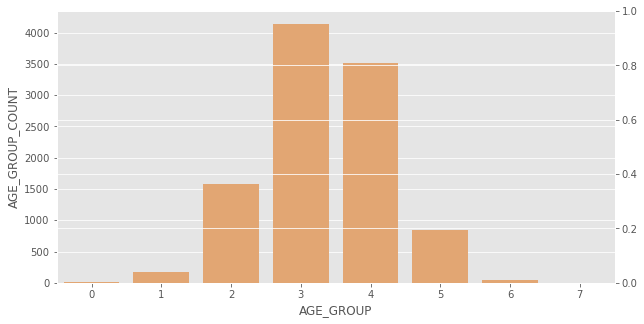

In [181]:
'''
# ilościowe zmienne bez ID
for col in ['AGE_GROUP']:
    ### drugi plot

    fig=plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(111)
    ax2 = plt.twinx()
    g=sns.barplot(x = 'AGE_GROUP',y ='AGE_GROUP_COUNT',data=_df_1,color = 'sandybrown',ax = ax1)
    
    ### O CO CHODZI
    g.set_xticklabels(['16-26','27-36','37-46',
                       '47-56','57-66','66-76'])
    
    sns.lineplot( data = _df,x = col, y = "CLM_FLG_PRCNT",ax = ax2,color = 'red')
    plt.show()
    
    
    ### drugi plot
    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(111)
    ax2 = plt.twinx()
    g = sns.barplot(x = 'AGE_GROUP',y = _df_1['AGE_GROUP_COUNT'],data=_df_1,color = 'sandybrown',ax = ax1)
    g.set_xticklabels(['16-26','27-36','37-46',
                       '47-56','57-66','66-76'
                       ])
    
    sns.lineplot( data = _df,x = col, y = "CLM_AMT_MEAN",ax = ax2,color = 'red')
    plt.show()
    
    ### drugi plot
    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(111)
    ax2 = plt.twinx()
    g = sns.barplot(x = 'AGE_GROUP',y = 'CLM_AMT_MEAN',data=_df,color = 'sandybrown',ax = ax1)
    g.set_xticklabels(['16-26','27-36','37-46',
                       '47-56','57-66',
                       ])

    sns.lineplot( data = _df , x = 'AGE_GROUP', y = "CLM_FLG_PRCNT",ax = ax2,color = 'red')
    plt.show()
'''

### 5. Analiza pareto spaghetti bolognese

In [71]:
df.head(5)

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_GROUP
0,63581743,0,16MAR39,60.0,0,11.0,67.348999,0,0.000000,0,...,1,4.461000,2,0,3,0.0,18.0,0,1,5
1,132761049,0,21JAN56,43.0,0,11.0,91.448997,0,257.252014,0,...,1,0.000000,0,0,0,0.0,1.0,0,1,3
2,921317019,0,18NOV51,48.0,0,11.0,52.881001,0,0.000000,0,...,1,0.000000,0,0,2,0.0,10.0,0,1,4
3,727598473,0,05MAR64,35.0,1,10.0,16.039000,0,124.191002,1,...,0,38.689999,2,0,3,0.0,10.0,0,1,2
4,450221861,0,05JUN48,51.0,0,14.0,NaN,0,306.251007,1,...,1,0.000000,0,0,0,0.0,6.0,0,1,4


### 6. Zależność pomiędzy zmiennymi - 

In [272]:
#sns.pairplot(df[list(report.columns)], hue = "CLAIM_FLAG")
#plt.show()

## 8. Zapis danych do modelu

In [373]:
lr_df  = []

In [75]:
df.to_csv('./dane/LR_dane_treningowe_testowe.csv')

In [74]:
df.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
AGE_GROUP       0
dtype: int64